In [1425]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

my_random_state = 10

In [1426]:
diabetes_data = pd.read_csv('prep_diabetes.csv')
diabetes_data.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,384.781768,3.866022,121.882597,72.400552,29.929558,132.643646,32.467127,0.474765,33.350829,0.343923
std,222.504870,3.362803,30.750030,12.379870,9.104390,91.027682,6.888941,0.332315,11.765393,0.475344
min,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,191.750000,1.000000,99.750000,64.000000,25.000000,105.000000,27.500000,0.245000,24.000000,0.000000
50%,385.500000,3.000000,117.000000,72.000000,32.000000,105.000000,32.400000,0.379000,29.000000,0.000000
75%,577.250000,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1427]:
diabetes_data['Outcome'].value_counts()

0    475
1    249
Name: Outcome, dtype: int64

array([<AxesSubplot: ylabel='0'>], dtype=object)

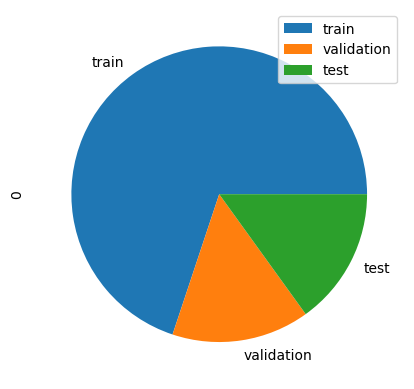

In [1428]:
X = diabetes_data[diabetes_data.columns[:-1]]
y = diabetes_data['Outcome']
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, random_state=my_random_state, test_size=0.3, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full,random_state=my_random_state, test_size=0.5, stratify=y_test_full)

pd.DataFrame([len(y_train), len(y_val), len(y_test)], index=['train', 'validation', 'test']).plot(kind='pie', subplots=True)

<AxesSubplot: title={'center': 'test'}, ylabel='Outcome'>

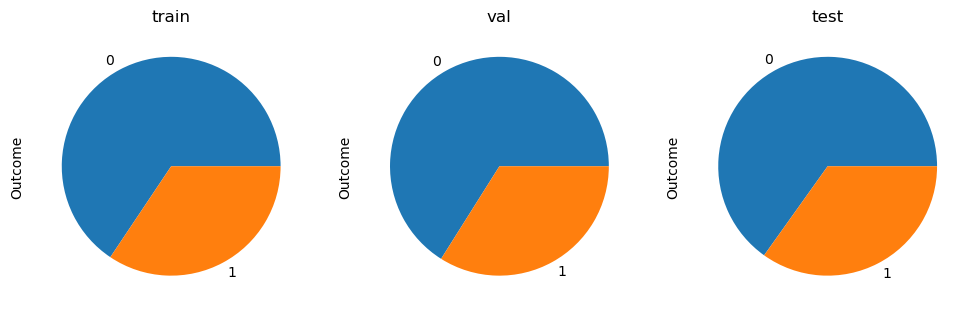

In [1429]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
y_train.value_counts().plot(kind='pie', ax=ax1, title='train')
y_val.value_counts().plot(kind='pie', ax=ax2, title='val')
y_test.value_counts().plot(kind='pie', ax=ax3, title='test')

### Trainieren von Model ohne Datenverteilung von 0 & 1 zu manipulieren

In [1430]:
X = diabetes_data[diabetes_data.columns[:-1]]
y = diabetes_data['Outcome']

dt_model = DecisionTreeClassifier(random_state=my_random_state)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 79.82%
Precision: 70.27%
Recall: 70.27%
F1: 70.27%


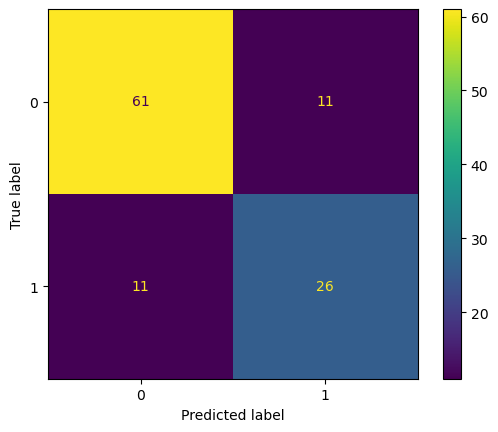

In [1431]:
cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### UnderSampling

In [1432]:
from imblearn.under_sampling import RandomUnderSampler

In [1433]:
undersampler = RandomUnderSampler(sampling_strategy=1, random_state=my_random_state)
X_under, y_under = undersampler.fit_resample(X_train, y_train)
y_under.value_counts()

0    174
1    174
Name: Outcome, dtype: int64

In [1434]:
X = diabetes_data[diabetes_data.columns[:-1]]
y = diabetes_data['Outcome']

dt_model = DecisionTreeClassifier(random_state=my_random_state)
dt_model.fit(X_under, y_under)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 65.14%
Precision: 49.02%
Recall: 67.57%
F1: 56.82%


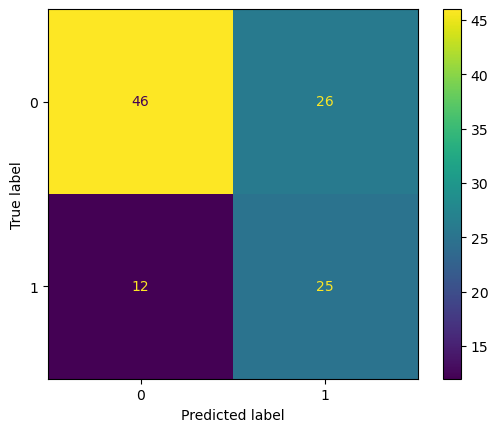

In [1435]:
cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### Oversampling

In [1436]:
from imblearn.over_sampling import RandomOverSampler

In [1437]:
oversampler = RandomOverSampler(sampling_strategy=1, random_state=my_random_state)
X_over, y_over = oversampler.fit_resample(X_train, y_train)
y_over.value_counts()

1    332
0    332
Name: Outcome, dtype: int64

In [1438]:
dt_model = DecisionTreeClassifier(random_state=my_random_state)
dt_model.fit(X_over, y_over)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 66.06%
Precision: 50.00%
Recall: 54.05%
F1: 51.95%


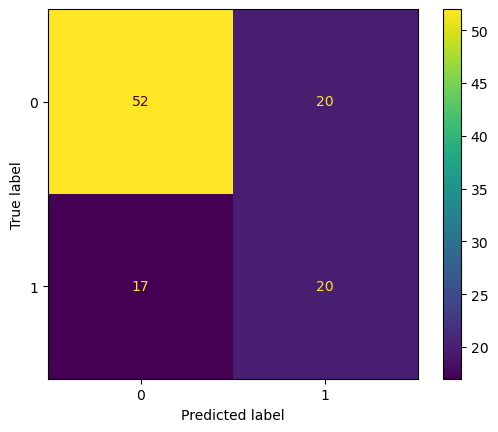

In [1439]:
cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### Kombinieren von OverSampling und UnderSampling

In [1440]:
oversampler = RandomOverSampler(sampling_strategy=0.8, random_state=my_random_state)
X_mix, y_mix = oversampler.fit_resample(X_train, y_train)
y_mix.value_counts()

0    332
1    265
Name: Outcome, dtype: int64

In [1441]:
undersampler = RandomUnderSampler(sampling_strategy=1, random_state=my_random_state)
X_mix, y_mix = undersampler.fit_resample(X_mix, y_mix)
y_mix.value_counts()

0    265
1    265
Name: Outcome, dtype: int64

In [1442]:
dt_model = DecisionTreeClassifier(random_state=my_random_state)
dt_model.fit(X_mix, y_mix)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 70.64%
Precision: 55.81%
Recall: 64.86%
F1: 60.00%


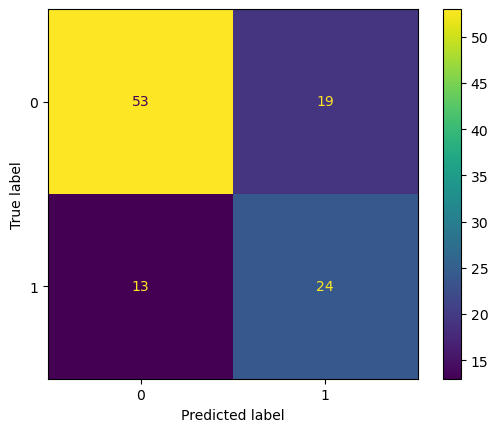

In [1443]:
cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### DummyClassifier

In [1444]:
from sklearn.dummy import DummyClassifier

In [1445]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 66.06%
Precision: 0.00%
Recall: 0.00%
F1: 0.00%


/Users/julsen/opt/miniconda3/envs/leoenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DecisionTreeClassifier

In [1446]:
def train_and_find_best_depth(X_train, X_val, y_train, y_val, do_print):
    result = None
    accuracy_max = -1
    
    for curr_max_depth in range(1, 20):
        dt_model = DecisionTreeClassifier(max_depth=curr_max_depth, random_state=my_random_state)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)
        if accuracy_score >= accuracy_max:
            accuracy_max = accuracy_score
            result = curr_max_depth
    if do_print:
        print('-' * 20)
        print('best max depth {} has {:.2%} accuracy.'.format(result, accuracy_max))

    return result

In [1447]:
best_max_depth = train_and_find_best_depth(X_train, X_val, y_train, y_val, True)

--------------------
best max depth 9 has 81.65% accuracy.


In [1448]:
X = diabetes_data[diabetes_data.columns[:-1]]
y = diabetes_data['Outcome']

dt_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=my_random_state)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 81.65%
Precision: 71.79%
Recall: 75.68%
F1: 73.68%


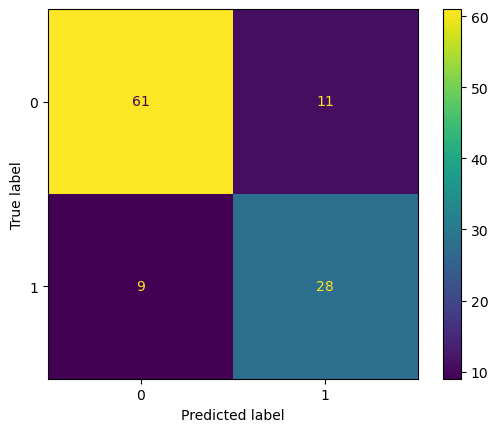

In [1449]:
cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### RandomForestClassifier

In [1450]:
from sklearn.ensemble import RandomForestClassifier

In [1451]:
def train_and_find_best_depth(X_train, X_val, y_train, y_val, do_print):
    result = None
    recall_max = -1
    precision_max = -1
    
    for curr_max_depth in range(1, 300):
        dt_model = RandomForestClassifier(max_depth=curr_max_depth, random_state=my_random_state)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        recall_score = metrics.recall_score(y_val, y_pred)
        precision_score = metrics.precision_score(y_val, y_pred)
        if (recall_score >= recall_max) & (precision_score >= precision_max):
            recall_max = recall_score
            precision_max = precision_score
            result = curr_max_depth
    if do_print:
        print('-' * 20)
        print('best max depth {} has {:.2%} recall.'.format(result, recall_max, precision_max))

    return result

def train_and_find_best_estimators(X_train, X_val, y_train, y_val, best_max_depth, do_print):
    result = None
    recall_max = -1
    precision_max = -1
    
    for curr_estimators_depth in range(1, 100):
        dt_model = RandomForestClassifier(n_estimators= curr_estimators_depth, max_depth= best_max_depth, random_state=my_random_state)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        recall_score = metrics.recall_score(y_val, y_pred)
        precision_score = metrics.precision_score(y_val, y_pred)
        if (recall_score >= recall_max) & (precision_score >= precision_max):
            recall_max = recall_score
            precision_max = precision_score
            result = curr_estimators_depth
    if do_print:
        print('-' * 20)
        print('best max estimators {} has {:.2%} recall.'.format(result, recall_max, precision_max))
        
    return result

def train_and_find_best_samples_split(X_train, X_val, y_train, y_val, best_max_depth, best_max_esitmators, do_print):
    result = None
    recall_max = -1
    precision_max = -1
    
    for curr_samples_split_depth in range(2, 200):
        dt_model = RandomForestClassifier(min_samples_split= curr_samples_split_depth, n_estimators= best_max_esitmators, max_depth= best_max_depth, random_state=my_random_state)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        recall_score = metrics.recall_score(y_val, y_pred)
        precision_score = metrics.precision_score(y_val, y_pred)
        if (recall_score >= recall_max) & (precision_score >= precision_max):
            recall_max = recall_score
            precision_max = precision_score
            result = curr_samples_split_depth
    if do_print:
        print('-' * 20)
        print('best max sample split {} has {:.2%} recall.'.format(result, recall_max, precision_max))

    return result

In [1452]:
best_max_depth = train_and_find_best_depth(X_mix, X_val, y_mix, y_val, True)

--------------------
best max depth 4 has 89.19% recall.


In [1453]:
best_max_estimators = train_and_find_best_estimators(X_mix, X_val, y_mix, y_val, best_max_depth, True)

--------------------
best max estimators 99 has 89.19% recall.


In [1454]:
best_max_samples_split = train_and_find_best_samples_split(X_mix, X_val, y_mix, y_val, best_max_depth, best_max_estimators, True)

--------------------
best max sample split 88 has 89.19% recall.


In [1455]:
X = diabetes_data[diabetes_data.columns[:-1]]
y = diabetes_data['Outcome']

dt_model = RandomForestClassifier(min_samples_split= best_max_samples_split,n_estimators= best_max_estimators, max_depth= best_max_depth, random_state=my_random_state)
dt_model.fit(X_mix, y_mix)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 78.90%
Precision: 63.46%
Recall: 89.19%
F1: 74.16%


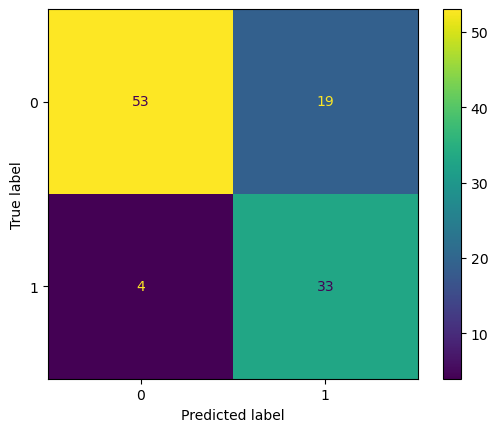

In [1456]:
cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

In [1457]:
y_pred = dt_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 77.06%
Precision: 63.27%
Recall: 81.58%
F1: 71.26%


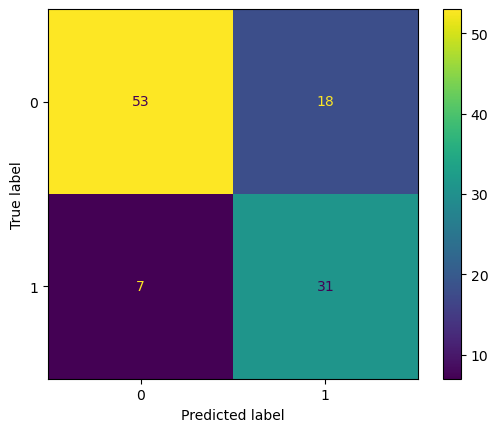

In [1458]:
cm = confusion_matrix(y_test, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()